# **Generate Binary Classification dataset**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
# Generate a dataset with 1000 samples, 2 classes (binary), with slight imbalance
X, y = make_classification(
    n_samples=1000,
    n_classes=2,
    weights=[0.6, 0.4],  # 60% class 0, 40% class 1
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

In [ ]:
#80% for training + validation and 20% for test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 80% of that, 60% is training and 20% is validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# **Model Build and Train**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)

DecisionTreeClassifier()

# **Model Prediction**

In [ ]:
# Predict on validation set
y_pred_val = dTree.predict(X_val)
y_prob_val = dTree.predict_proba(X_val)[:,1] # probabilities for roc curve

# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred_val)
print(cm)

[[100   6]
 [  4  50]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

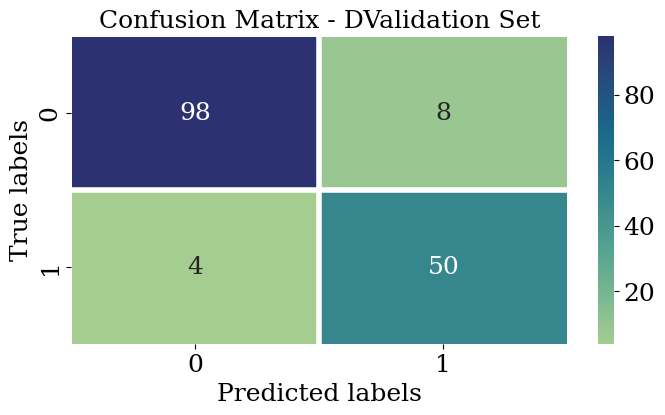

In [ ]:
# create figure
fig, ax = plt.subplots(figsize=(8, 4))
# Define color map
cmap = sns.color_palette('crest', as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

# Title for the confusion matrix
title = "Confusion Matrix - DValidation Set"
# Axis and Label ticks
ax.set_title(title, fontsize=18)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

# Gridline inside the confusion Matrix
ax.hlines([1], *ax.get_xlim(), color='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), color='white', linewidth=4)

plt.show()